# Proyecto IV:  Test your knowledge

En este proyecto final para la asignatura de Aprendizaje automático de Máquinas, el profesor Alexander quiere que sus alumnos prueben todos sus conocimientos en el desarrollo de sistemas de clasificación o regresión utilizando redes neuronales artificiales clásicas. Para este proyecto el profesor Alexander busco dos problemas de clasificación y dos problemas de regresión de la base de datods de problemas de Machine Learning [UCI Repository](https://archive.ics.uci.edu/ml/index.php). La idea es que los estudiantes se dividan en grupos de dos personas, y del listado de problemas escojan un problema para solucionarlo. En cada uno de los problemas los estudiantes deberán proporcionar los siguientes elementos:

1. Explicación básica del problema.
2. Un notebook con el desarrollo del problema:
    * Tratamiento de los datos,
    * Esquema de entrenamiento.
    * Esquema de prueba de funcionamioento del modelo
    * Evaluación de los modelos de clasificación o regresión, generación de intervalos de confidencia para la salida de regresión (Estimación, errores, etc..) o clasificiación (medidas de performance como accuracy, sensitivity, AUC, curva ROC, matriz de confusión, etc... con sus respectivos intervalos de confidencia).
    
    
3. El notebook con una discusión a fondo del comportamiento de los modelos incluyendo los siguentes aspectos, pero no limitado a ellos:
    * Discusion a fondo de los resultados, si hay un clasificador de varias clases, ¿En prueba se comporta igual para todas las clases? ¿Si no se comporta igual esto a que se debe?, En regresión ¿en que partes los intervalos de confdencia son menores?, ¿porque?. Asi con los demás puntos que ustedes quieran discutir.
    * Discusión sobre que información pueden obtener a partir de los resultados que entrega el modelo. (¿que varaibles son más importantes? ¿Cuando funciona mejor/peor?, etc..)
    * Discusión a fondo del comportamiento de los modelos encontrados, posibles fallas, posibles mejoras.
    
    
4. Una reflexión sobre lo aprendido del curso, ¿cubrio sus espectativas?, ¿Su visión de Machine Learning cambió o se mantuvo igual?, ¿Qué le mejoraria al curso?, ¿Cual fue su tema favorito y menos favorito? y otros comentarios que deseen agregar.


Los problemas a solucionar son los siguientes:

**Clasificación I: Wine Quality**, desarrolle un clasificador que permita identificar la calidad del vino. La información la encuentran [aquí.](https://archive.ics.uci.edu/ml/datasets/Wine+Quality)

**Clasificación II: Bank Marketing**, desarrollar un sistema de clasificación para determinar si un cliente inscribira un deposito a término o no. La información la pueden encontrar [aquí.](https://archive.ics.uci.edu/ml/datasets/Bank+Marketing)

**Regresión I: Estimando el Tráfico en Sao Paulo**, desarrolar un modelo de regresión que permita identificar cual es la lentitud del trafico en Sao Paulo, Brazil, la información la pueden encontrar [aquí.](https://archive.ics.uci.edu/ml/datasets/Behavior+of+the+urban+traffic+of+the+city+of+Sao+Paulo+in+Brazil)

**Regresión II: Estimando demanda de energia de una casa**, desarrollar un modelo de regresión que permita predecir el consumo de energía en una casa. La información la pueden encontrar [aquí.](https://archive.ics.uci.edu/ml/datasets/Individual+household+electric+power+consumption)


**NOTA:** Si desean trabajar en otro problema que se encuentre en este repositorio me pueden indicar su interes y evaluamos si se puede desarrollar.


**El proyecto se debe entregar el Viernes 26 de Noviembre, a más tardar las 11:59 p.m.**

Universidad del Rosario 
Final project
2021 - 2s

Giancarlo González


Link to the repository:
https://github.com/GiancarloGonzalez2001/Malware_Detection_with_Artificial_Intelligence

In [166]:
# All the libraries are imported

#import os
import glob
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn_extra.cluster import KMedoids
from collections import Counter

In [194]:
# The previous csv its read
red_dataset = pd.read_excel('C:/Users/gianc/OneDrive/Documentos/Universidad_Rosario/Aprendizaje_automatico_maquina/Proyecto_4/data/winequality-red.xlsx')
white_dataset = pd.read_excel('C:/Users/gianc/OneDrive/Documentos/Universidad_Rosario/Aprendizaje_automatico_maquina/Proyecto_4/data/winequality-white.xlsx')
# data change
red_dataset['quality']=red_dataset['quality'].replace([3,4],[0,0])
red_dataset['quality']=red_dataset['quality'].replace([5,6],[1,1])
red_dataset['quality']=red_dataset['quality'].replace([7,8],[2,2])

white_dataset['quality']=white_dataset['quality'].replace([3,4],[0,0])
white_dataset['quality']=white_dataset['quality'].replace([5,6],[1,1])
white_dataset['quality']=white_dataset['quality'].replace([7,8,9],[2,2,2])
# data 
data_red = red_dataset.iloc[:, [0,1,2,3,4,5,6,7,8,9,10]].values
data_white = white_dataset.iloc[:, [0,1,2,3,4,5,6,7,8,9,10]].values 
# data normalize
data_red= preprocessing.Normalizer().fit_transform(data_red)
data_white =  preprocessing.Normalizer().fit_transform(data_white)
# train data
train_red = data_red[0:1120]
train_white = data_white[0:3429]
# data test 
test_red = data_red[1120:]
test_white = data_white[3429:]
# targets train
targets_train_red = red_dataset.iloc[0:1120, 11].values
targets_train_white = white_dataset.iloc[0:3429, 11].values
# targets test
targets_test_red = red_dataset.iloc[1120:, 11].values
targets_test_white =  white_dataset.iloc[3429:, 11].values


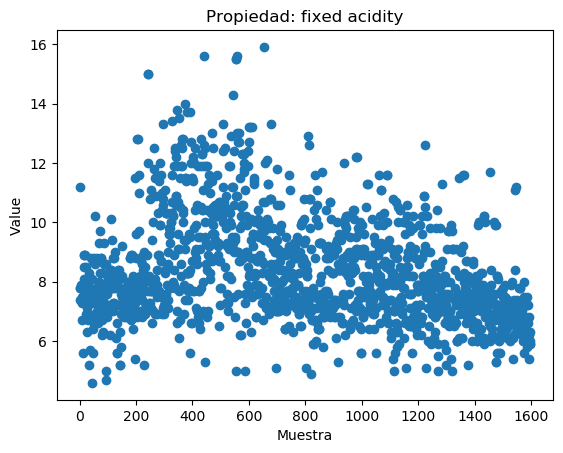

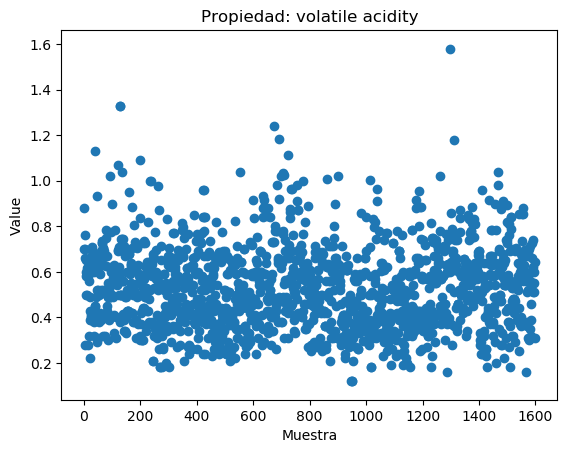

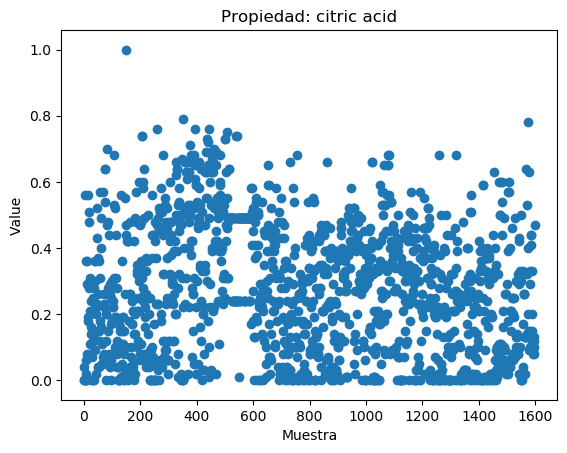

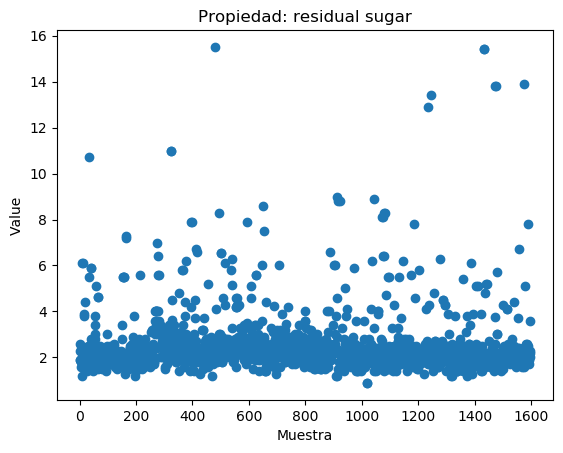

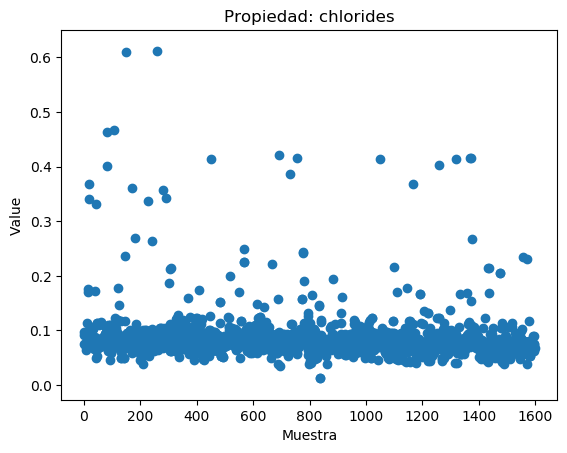

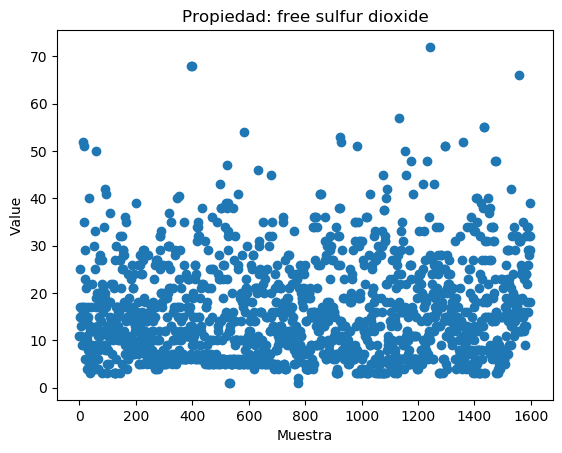

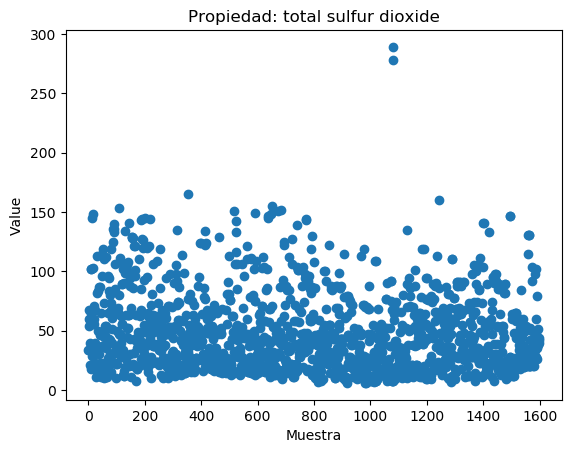

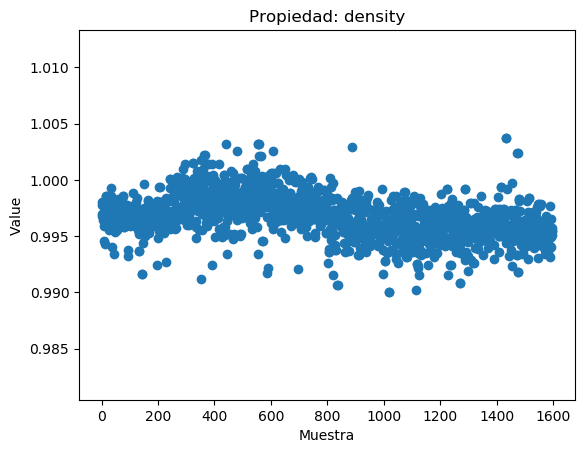

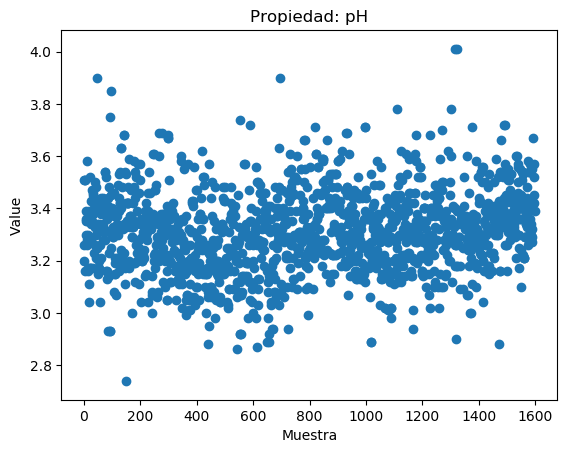

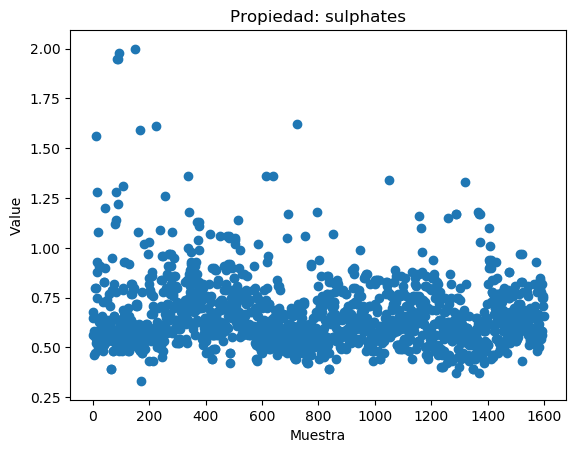

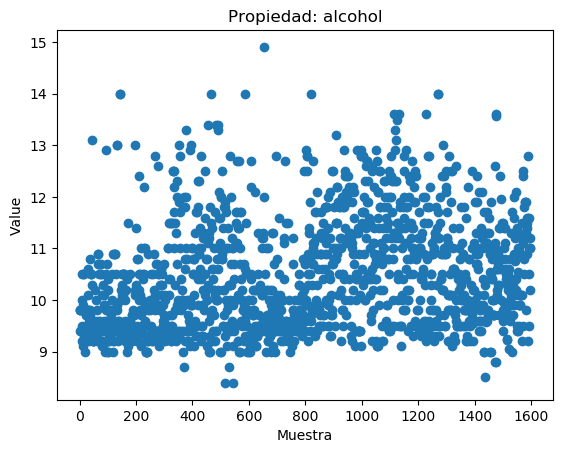

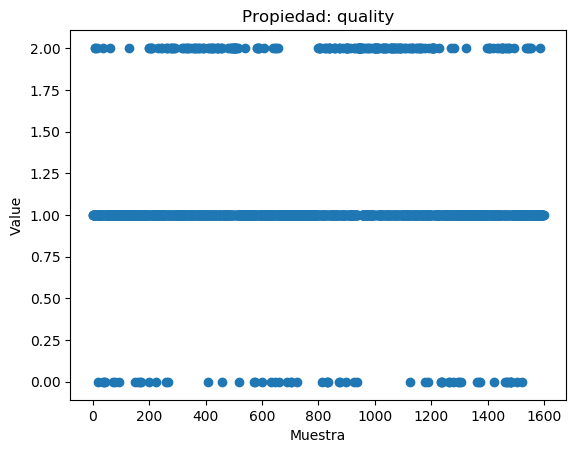

In [195]:
# data exploration - red wine 
fig = plt.figure()
fig.tight_layout()
aux = 1
for i in red_dataset:
    ax = plt.subplot()
    ax.scatter(range(0,1599),red_dataset[i])
    ax.set_xlabel("Muestra")
    ax.set_ylabel("Value")
    ax.set_title("Propiedad: " + str(i))
    plt.show()
    aux += 1

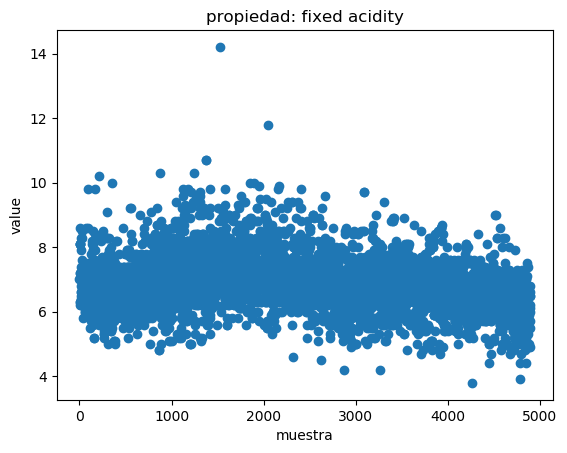

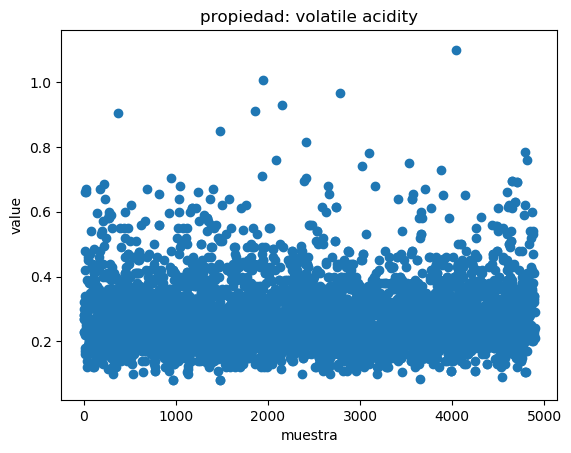

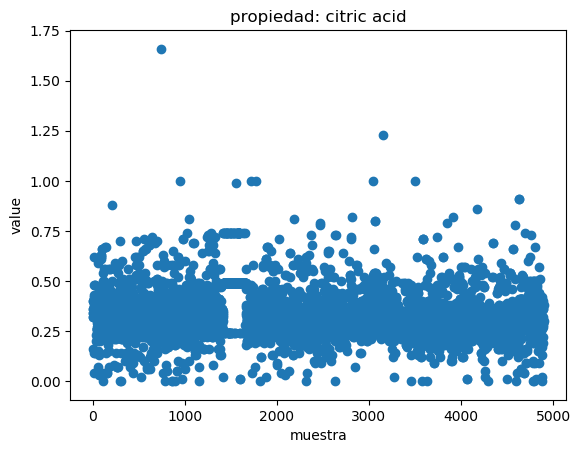

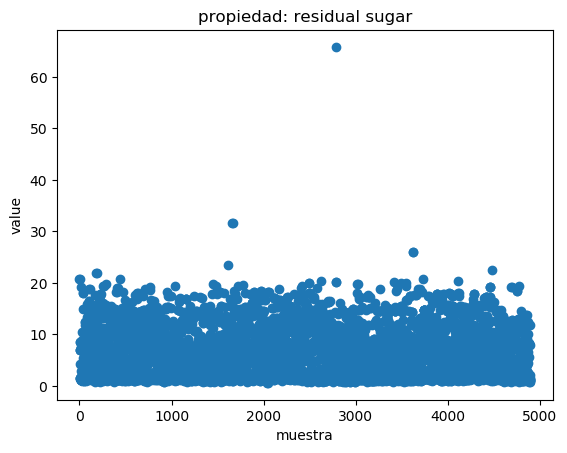

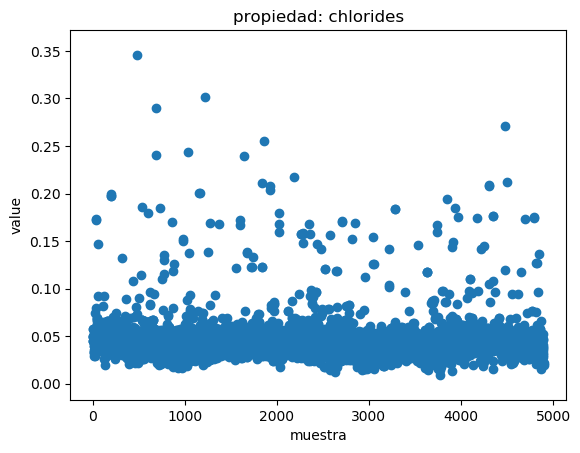

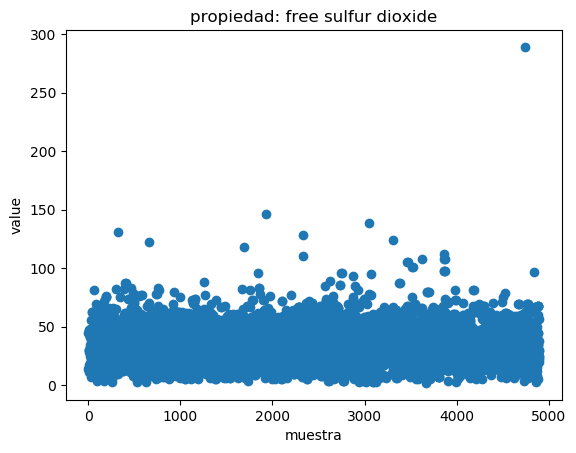

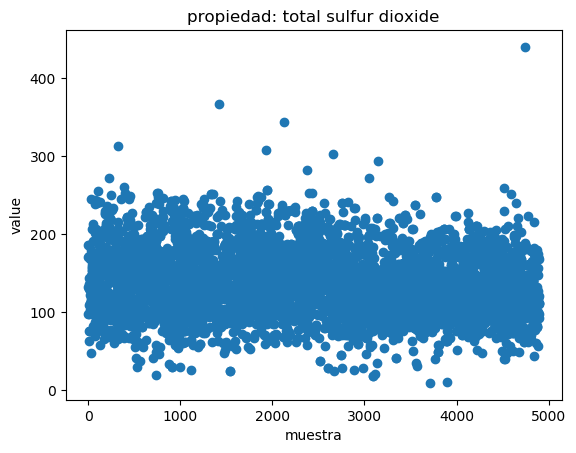

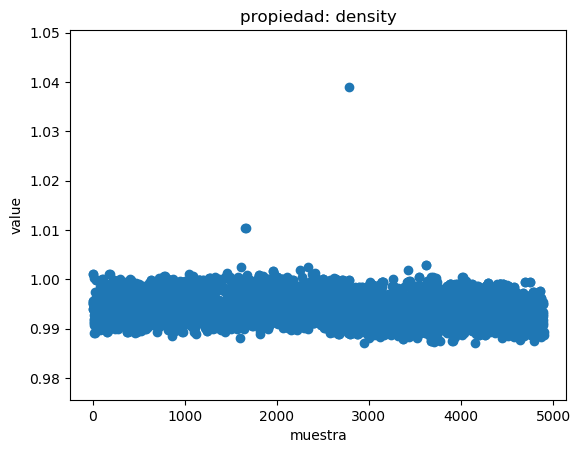

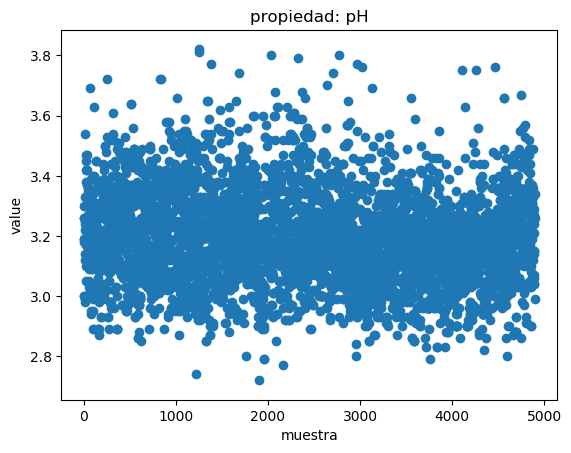

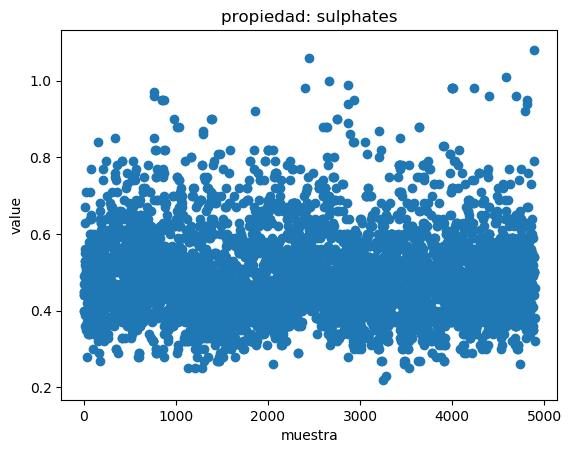

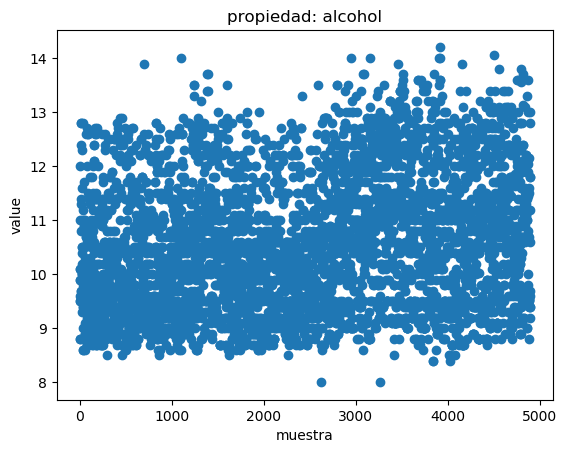

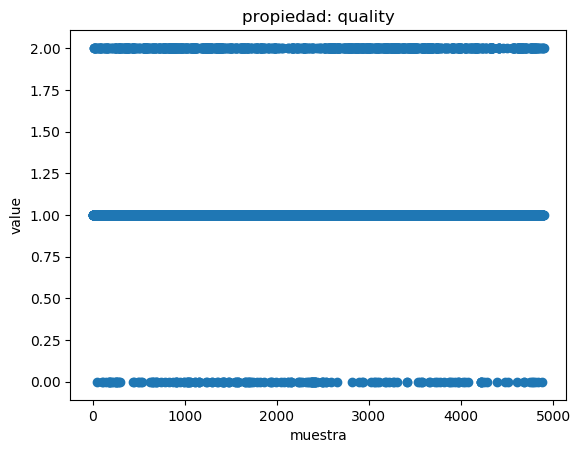

In [196]:
# data exploration - white wine 
fig = plt.figure()
fig.tight_layout()
aux = 1
for i in white_dataset:
    ax = plt.subplot()
    ax.scatter(range(0,4898),white_dataset[i])
    ax.set_xlabel("muestra")
    ax.set_ylabel("value")
    ax.set_title("propiedad: " + str(i))
    plt.show()
    aux += 1

[1, 2, 0]


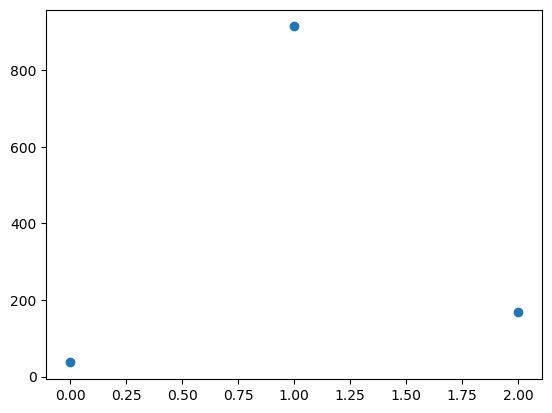

In [197]:
# red targets exploration
contador = Counter(targets_train_red)
X=[]
Y=[]
for x,y in contador.items():
    X.append(x)
    Y.append(y)
plt.scatter(X,Y)
plt.show()

[1, 2, 0]


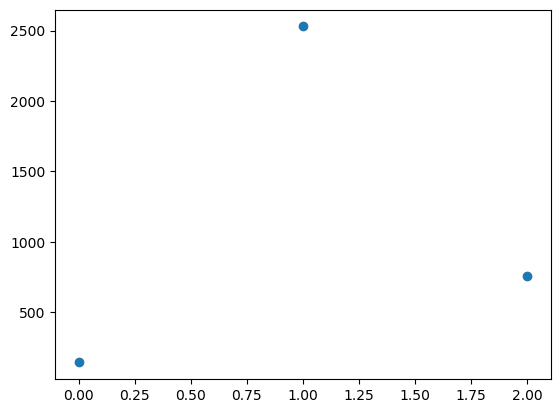

In [198]:
# white targets exploration
contador = Counter(targets_train_white)
X=[]
Y=[]
for x,y in contador.items():
    X.append(x)
    Y.append(y)
plt.scatter(X,Y)
plt.show()

C:\Users\gianc\Anaconda3\lib\site-packages\sklearn_extra\cluster\_k_medoids.py:279: UserWarning: Cluster 4 is empty! self.labels_[self.medoid_indices_[4]] may not be labeled with its corresponding cluster (4).
  "its corresponding cluster ({k}).".format(k=k)
C:\Users\gianc\Anaconda3\lib\site-packages\sklearn_extra\cluster\_k_medoids.py:279: UserWarning: Cluster 4 is empty! self.labels_[self.medoid_indices_[4]] may not be labeled with its corresponding cluster (4).
  "its corresponding cluster ({k}).".format(k=k)
C:\Users\gianc\Anaconda3\lib\site-packages\sklearn_extra\cluster\_k_medoids.py:279: UserWarning: Cluster 4 is empty! self.labels_[self.medoid_indices_[4]] may not be labeled with its corresponding cluster (4).
  "its corresponding cluster ({k}).".format(k=k)
C:\Users\gianc\Anaconda3\lib\site-packages\sklearn_extra\cluster\_k_medoids.py:279: UserWarning: Cluster 4 is empty! self.labels_[self.medoid_indices_[4]] may not be labeled with its corresponding cluster (4).
  "its corres

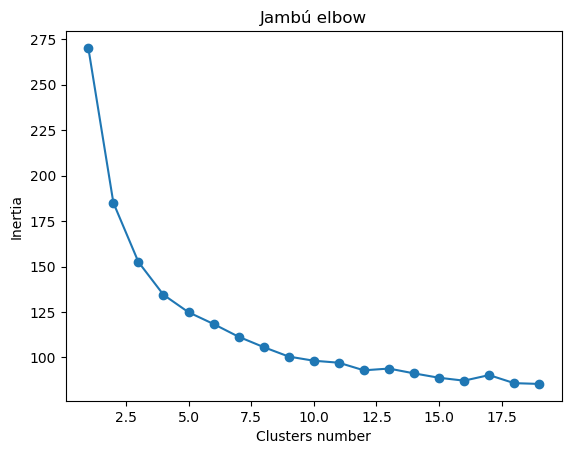

In [199]:
# number clusters wine-red
inercia = []
for i in range(1,20):
    kmedoids = KMedoids(n_clusters=i, random_state=0).fit(train_red)
    inercia.append(kmedoids.inertia_)
plt.title("Jambú elbow")
plt.ylabel("Inertia")
plt.xlabel("Clusters number")
plt.plot(range(1,20),inercia,marker='o')
plt.show()

C:\Users\gianc\Anaconda3\lib\site-packages\sklearn_extra\cluster\_k_medoids.py:279: UserWarning: Cluster 4 is empty! self.labels_[self.medoid_indices_[4]] may not be labeled with its corresponding cluster (4).
  "its corresponding cluster ({k}).".format(k=k)
C:\Users\gianc\Anaconda3\lib\site-packages\sklearn_extra\cluster\_k_medoids.py:279: UserWarning: Cluster 4 is empty! self.labels_[self.medoid_indices_[4]] may not be labeled with its corresponding cluster (4).
  "its corresponding cluster ({k}).".format(k=k)
C:\Users\gianc\Anaconda3\lib\site-packages\sklearn_extra\cluster\_k_medoids.py:279: UserWarning: Cluster 4 is empty! self.labels_[self.medoid_indices_[4]] may not be labeled with its corresponding cluster (4).
  "its corresponding cluster ({k}).".format(k=k)
C:\Users\gianc\Anaconda3\lib\site-packages\sklearn_extra\cluster\_k_medoids.py:279: UserWarning: Cluster 4 is empty! self.labels_[self.medoid_indices_[4]] may not be labeled with its corresponding cluster (4).
  "its corres

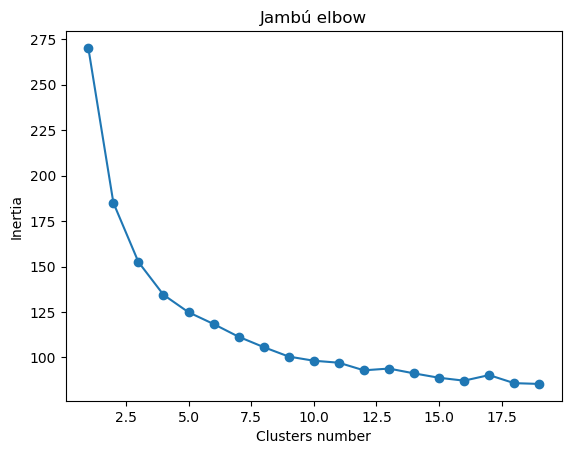

In [200]:
# number clusters wine-white
inercia = []
for i in range(1,20):
    kmedoids = KMedoids(n_clusters=i, random_state=0).fit(train_red)
    inercia.append(kmedoids.inertia_)
plt.title("Jambú elbow")
plt.ylabel("Inertia")
plt.xlabel("Clusters number")
plt.plot(range(1,20),inercia,marker='o')
plt.show()

In [206]:
# k-means red wine
# Object creation

kmedoids_red = KMedoids(n_clusters=3, random_state=0).fit(train_red)
labels_red = kmedoids_red.predict(test_red)

print("K-meadoids labels: " + str(labels_red))
print ("\nK-medoids Clustering Results:\n\n", pd.crosstab(targets_test_red,
labels_red,rownames = ["Observed"],colnames = ["Predicted"]) )
print ("\nSilhouette coefficient: %0.3f" % silhouette_score(train_red,
kmedoids_red.labels_, metric='euclidean'))
print("Process successfully completed") # Test message



K-meadoids labels: [1 2 2 2 1 2 1 2 0 0 1 0 2 1 1 2 1 1 0 0 0 0 1 2 2 2 1 1 1 1 1 0 0 2 2 0 2
 0 2 2 1 2 1 1 1 2 0 2 0 1 1 2 1 2 2 2 2 1 0 0 0 1 2 0 0 0 1 0 0 1 1 1 2 1
 0 0 0 1 0 0 1 1 1 2 2 2 2 2 2 2 1 2 1 1 1 2 0 2 2 2 2 2 0 1 1 0 2 1 0 0 0
 2 0 2 1 0 1 1 2 1 2 2 2 0 0 2 0 2 2 2 2 2 1 1 2 2 2 0 2 2 0 2 2 2 2 2 2 1
 2 0 2 2 2 2 2 0 1 1 0 1 2 2 1 0 2 2 2 1 0 0 1 2 2 1 2 2 2 2 1 1 2 2 1 2 0
 0 0 2 0 2 0 2 2 0 0 0 2 2 0 0 0 2 1 2 2 2 2 2 2 0 0 2 2 0 1 2 2 2 2 2 2 2
 2 2 1 2 1 1 1 2 2 0 0 0 2 0 0 2 2 2 2 0 2 0 2 0 0 0 0 1 0 1 0 0 2 0 2 0 2
 2 2 2 0 0 0 0 2 2 0 0 2 0 1 0 0 1 1 0 2 2 0 0 1 1 0 2 1 2 2 2 1 1 1 0 1 1
 1 2 1 0 1 2 2 2 2 2 2 1 2 2 2 0 1 2 2 2 0 2 1 0 2 0 2 1 0 0 2 2 2 2 2 1 2
 0 1 1 0 0 1 1 2 1 2 2 2 2 2 2 2 2 2 1 2 2 2 0 2 0 1 2 1 2 1 1 1 2 2 1 1 1
 1 1 1 0 2 2 0 1 1 1 1 0 0 1 1 1 1 1 2 1 2 2 1 0 0 0 2 2 1 2 2 2 2 2 2 2 2
 2 0 2 1 2 2 0 2 2 2 2 2 2 2 2 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 2 2
 2 2 2 2 2 2 2 2 0 0 0 1 2 2 2 2 2 2 2 0 2 2 2 2 0 0 2 2 2 2 2 2 2 2 2]

K-medoid

In [205]:
# k-means white wine
# Object creation

kmedoids_white = KMedoids(n_clusters=3, random_state=0).fit(train_white)
labels_white = kmedoids_white.predict(test_white)

print("K-medoids labels: " + str(labels_white))
print ("\nK-medoids Clustering Results:\n\n", pd.crosstab(targets_test_white,
labels_white,rownames = ["Observed"],colnames = ["Predicted"]) )
print ("\nSilhouette coefficient: %0.3f" % silhouette_score(train_white,
kmedoids_white.labels_, metric='euclidean'))
print("Process successfully completed") # Test message


K-medoids labels: [2 2 2 ... 1 0 1]

K-medoids Clustering Results:

 Predicted    0    1    2
Observed                
0           24    5   10
1          273  358  495
2           46   96  162

Silhouette coefficient: 0.266
Process successfully completed


In [210]:
# Confusion matrix red wine 
con_matr=confusion_matrix(targets_test_red,labels_red)
accuracy=accuracy_score(targets_test_red, labels_red)
f1 = con_matr[0]
f2 = con_matr[1]
f3 = con_matr[2]
TP = f1[0]
FN = f1[1]
FN1 = f1[2]
FP = f2[0]
TN = f2[1]
FP2 = f2[2]
F1 = f3[0]
F2 = f3[1]
T3 = f3[2]
print("Sensitivity: ",TP/(TP+FN+FN1))    # clasificados corectamente clase 1
print("Specificity: ",TN/(TN+FP+FP2))    # clasificados correctamente clase 2 
print("Sensitivity row 3: ",T3/(T3+F1+F2)) 
print("Precision: ", TP/(TP+FP+F1))
print("Negative Predictive value: ", TN/(TN+FN+F2))
print("Accueracy: ", accuracy)


Sensitivity:  0.07692307692307693
Specificity:  0.21728395061728395
Sensitivity row 3:  0.5833333333333334
Precision:  0.01680672268907563
Negative Predictive value:  0.7586206896551724
Accueracy:  0.24634655532359082


In [211]:
# Confusion matrix white wine 
con_matr=confusion_matrix(targets_test_white,labels_white)
accuracy=accuracy_score(targets_test_white, labels_white)
f1 = con_matr[0]
f2 = con_matr[1]
f3 = con_matr[2]
TP = f1[0]
FN = f1[1]
FN1 = f1[2]
FP = f2[0]
TN = f2[1]
FP2 = f2[2]
F1 = f3[0]
F2 = f3[1]
T3 = f3[2]
print("Sensitivity: ",TP/(TP+FN+FN1))    # clasificados corectamente clase 1
print("Specificity: ",TN/(TN+FP+FP2))    # clasificados correctamente clase 2 
print("Sensitivity row 3: ",T3/(T3+F1+F2)) 
print("Precision: ", TP/(TP+FP+F1))
print("Negative Predictive value: ", TN/(TN+FN+F2))
print("Accueracy: ", accuracy)

Sensitivity:  0.6153846153846154
Specificity:  0.31793960923623443
Sensitivity row 3:  0.5328947368421053
Precision:  0.06997084548104957
Negative Predictive value:  0.7799564270152506
Accueracy:  0.37031994554118447
